In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data collection and preprocessing

In [ ]:
sonar_data = pd.read_csv('/content/drive/MyDrive/ML project/sonar.all-data.csv')
sonar_data.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_data.shape

(208, 61)

In [ ]:
sonar_data.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
sonar_data['Label'].value_counts()

,count
Label,
M,111
R,97


M-->Mine
R-->Rock


In [ ]:

sonar_data.groupby(sonar_data.columns[60]).mean()



,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
Label,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
X = sonar_data.drop(columns=sonar_data.columns[60], axis=1)
Y = sonar_data[sonar_data.columns[60]]


In [ ]:
print (X)
print (Y)

     Freq_1  Freq_2  Freq_3  Freq_4  Freq_5  Freq_6  Freq_7  Freq_8  Freq_9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     Freq_10  ...  Freq_51  Freq_52  Freq_53  Freq_

Training and Testing Data

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split( X, Y, test_size = 0.1, stratify =  Y, random_state = 1)


In [ ]:
print (X.shape, X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


Model training ----> Logisticregression

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(X_train, Y_train)

print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)

score = model.score(X_test, Y_test)
print("R^2 Score:", score)

Model Coefficient: [[-0.2207275  -0.23062811 -0.18950938 -0.41219927 -0.32457173 -0.12836477
   0.09071935 -0.01084424 -0.87647186 -1.07854653 -1.52762016 -1.45315881
  -0.73191133 -0.06578904  0.14875     0.49235346  0.41105869  0.42836943
  -0.31732808 -0.65421275 -0.68804952 -0.50453904 -0.432445   -0.36676662
   0.34071934  0.05112759 -0.13127046 -0.34565349 -0.34820838 -0.35534108
   0.85250476 -0.23285813 -0.10674682  0.14924855  0.53563972  1.28127331
   0.78846089 -0.22898153 -0.38658355  0.51979248  0.01280142 -0.66440849
  -0.87779997 -0.99354948 -1.60645991 -1.3373401  -0.77372864 -0.78706677
  -0.53074904 -0.02919074 -0.12966971 -0.10284868 -0.03448652 -0.0692961
  -0.01508156 -0.03756764 -0.00532275 -0.0658927  -0.05836311 -0.02415889]]
Model Intercept: [2.93935967]
R^2 Score: 0.7619047619047619


Model Evalution

In [ ]:
from sklearn.metrics import accuracy_score


Y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 83.42%


In [ ]:
from sklearn.metrics import accuracy_score
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 76.19%


Making a predictive system:

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
import numpy as np
X = np.array([[0.0317, 0.0956, 0.1321], [0.1408, 0.1674, 0.171], [0.0731, 0.1401, 0.2083]])
Y = np.array([0, 1, 1])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")







Test Accuracy: 0.00%


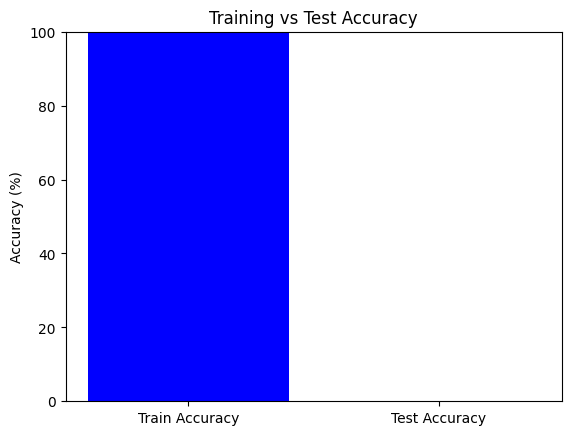

Train Accuracy: 100.00%
Test Accuracy: 0.00%


In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([[0.0317, 0.0956, 0.1321], [0.1408, 0.1674, 0.171], [0.0731, 0.1401, 0.2083]])
Y = np.array([0, 1, 1])

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Predict on the test set and calculate test accuracy
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Predict on the training set and calculate training accuracy
Y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

# Prepare data for the graph
accuracy_scores = [train_accuracy * 100, test_accuracy * 100]
labels = ['Train Accuracy', 'Test Accuracy']

# Plot the graph
plt.bar(labels, accuracy_scores, color=['blue', 'orange'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy')
plt.show()

# Print the accuracies
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

